# R ML Crash Course_Part 2:  Data Visualization

## Full Day Workshop for user learn Data Science with R
### 2018  Timothy CL Lam
This is meant for internal usage, part of contents copied externally, not for commercial purpose


# Data Visualization
## The fastest way to improve your understanding of your dataset is to visualize it.


## Visualization Packages
There are many ways to visualize data in R, but a few packages have surfaced as perhaps being
the most generally useful.
- graphics package: Excellent for fast and basic plots of data.
- lattice package: More pretty plots and more often useful in practice.
- ggplot2 package: Beautiful plots that you want to generate when you need to present
results.

## General Tips
1. recommend that you stick with simple plots from the graphics package for quick and
dirty visualization, 
2. use wrappers around lattice (via the caret package) for more useful
multivariate plots. 
3. ggplot2 plots are excellent and look lovely, but overkill

## Univariate Visualization
- Univariate plots are plots of individual attributes without interactions. 
- The goal is to learn
something about the distribution, central tendency and spread of each attribute.

### Histograms
- Histograms provide a bar chart of a numeric attribute split into bins with the height showing
the number of instances that fall into each bin.

In [8]:
# The code was removed by DSX for sharing.

Warning message:
“closing unused RODBC handle 3”

CAL_WEEK_OF_YEAR,CAL_YEAR,CUSTOMER_LOCATION_ID,TEMP,PRECIP,SKU_NUMBER,UNIT_SALES
14,2007-01-01,1427,47,0,1001,96
14,2007-01-01,1428,56,0,1001,238
14,2007-01-01,1429,50,3,1001,251
14,2007-01-01,1430,46,0,1001,89
14,2007-01-01,1431,64,0,1001,19
14,2007-01-01,1432,29,0,1001,128


In [25]:
dim(df1)

[1] 208000      7

In [9]:
str(df1)

'data.frame':	208000 obs. of  7 variables:
 $ CAL_WEEK_OF_YEAR    : chr  "14" "14" "14" "14" ...
 $ CAL_YEAR            : chr  "2007-01-01" "2007-01-01" "2007-01-01" "2007-01-01" ...
 $ CUSTOMER_LOCATION_ID: chr  "1427" "1428" "1429" "1430" ...
 $ TEMP                : int  47 56 50 46 64 29 49 56 71 59 ...
 $ PRECIP              : int  0 0 3 0 0 0 3 0 0 2 ...
 $ SKU_NUMBER          : chr  "1001" "1001" "1001" "1001" ...
 $ UNIT_SALES          : int  96 238 251 89 19 128 479 46 244 470 ...


In [15]:
df1 <- transform(df1, SKU_NUMBER = as.numeric(SKU_NUMBER))

In [16]:
str(df1)

'data.frame':	208000 obs. of  7 variables:
 $ CAL_WEEK_OF_YEAR    : chr  "14" "14" "14" "14" ...
 $ CAL_YEAR            : chr  "2007-01-01" "2007-01-01" "2007-01-01" "2007-01-01" ...
 $ CUSTOMER_LOCATION_ID: chr  "1427" "1428" "1429" "1430" ...
 $ TEMP                : int  47 56 50 46 64 29 49 56 71 59 ...
 $ PRECIP              : int  0 0 3 0 0 0 3 0 0 2 ...
 $ SKU_NUMBER          : num  1001 1001 1001 1001 1001 ...
 $ UNIT_SALES          : int  96 238 251 89 19 128 479 46 244 470 ...


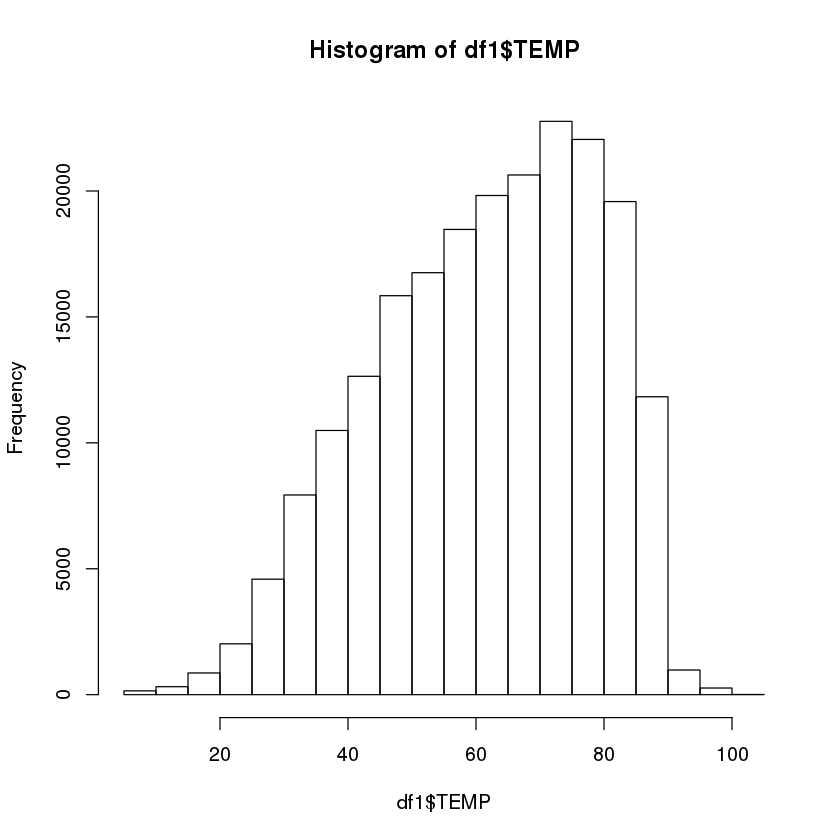

In [22]:
hist(df1$TEMP)

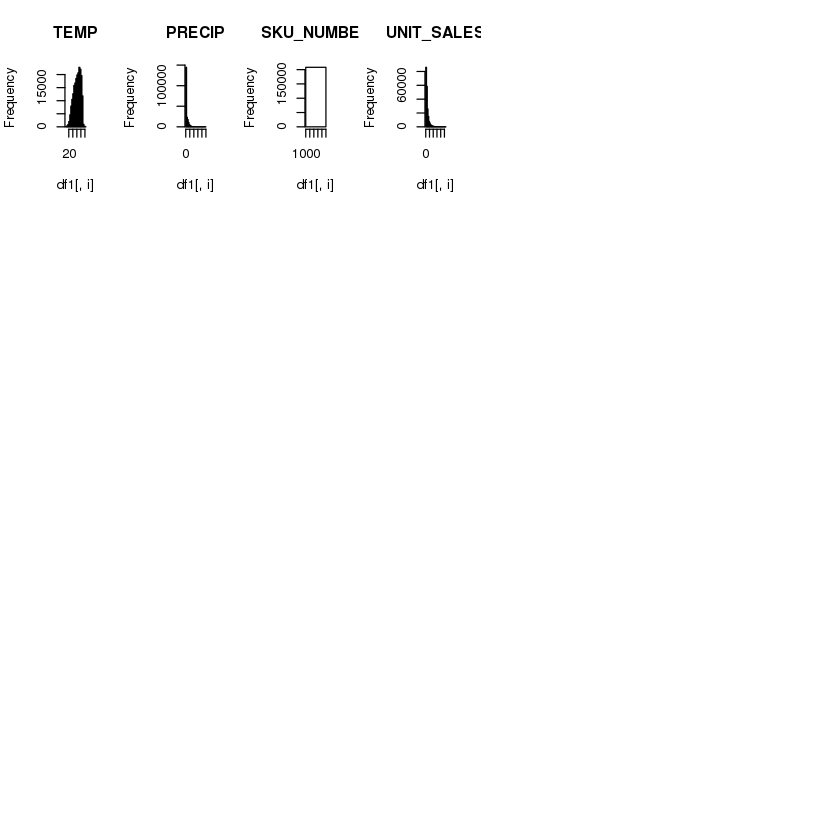

In [17]:
# create histograms for each attribute
par(mfrow=c(4,7))
for(i in 4:7) {
hist(df1[,i], main=names(df1)[i])
}

## Density Plots
- We can smooth out the histograms to lines using a density plot


Attaching package: ‘lattice’

The following object is masked from ‘package:SparkR’:

    histogram



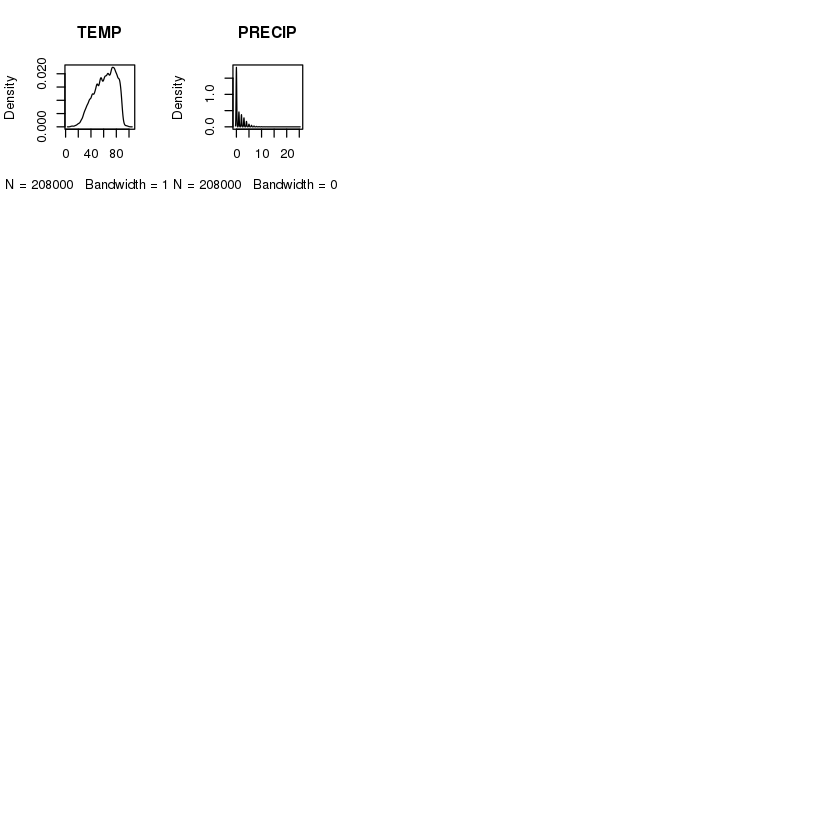

In [23]:
# load packages
library(lattice)

# create a layout of simpler density plots by attribute
par(mfrow=c(4,5))
for(i in 4:5) {
plot(density(df1[,i]), main=names(df1)[i])
}

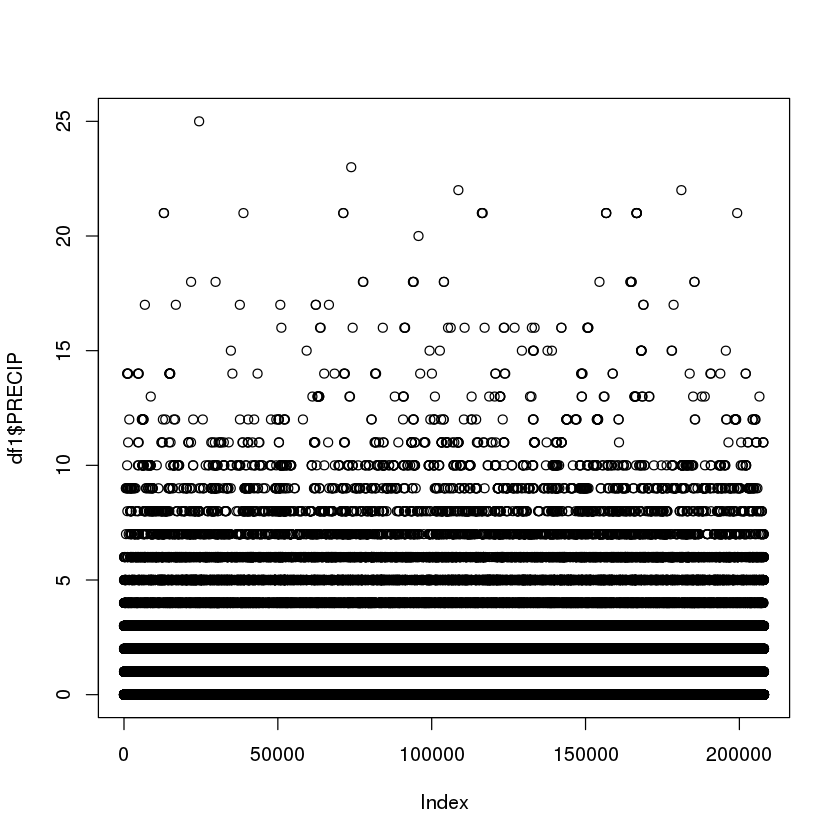

In [27]:
plot(df1$PRECIP)

## Box And Whisker Plots
- We can look at the distribution of the data a dierent way using box and whisker plots. 
- The
box captures the middle 50% of the data, 
- the line shows the median and the whiskers of the
plots show the reasonable extent of data.

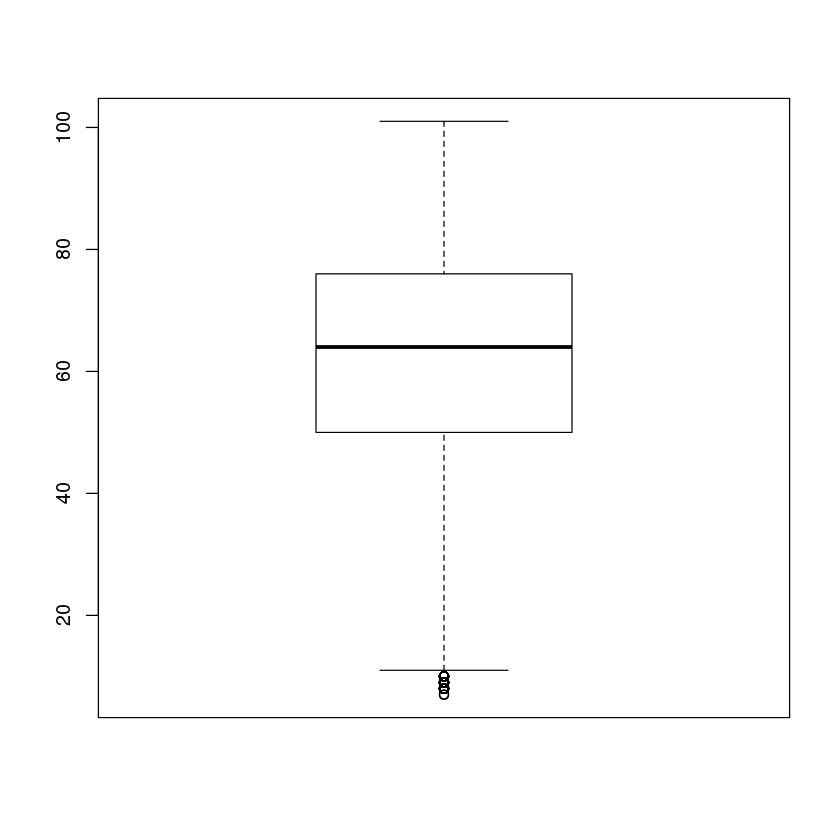

In [28]:
boxplot(df1$TEMP)

## Bar Plots
### In datasets that have categorical rather than numeric attributes,

In [29]:
str(df1)

'data.frame':	208000 obs. of  7 variables:
 $ CAL_WEEK_OF_YEAR    : chr  "14" "14" "14" "14" ...
 $ CAL_YEAR            : chr  "2007-01-01" "2007-01-01" "2007-01-01" "2007-01-01" ...
 $ CUSTOMER_LOCATION_ID: chr  "1427" "1428" "1429" "1430" ...
 $ TEMP                : int  47 56 50 46 64 29 49 56 71 59 ...
 $ PRECIP              : int  0 0 3 0 0 0 3 0 0 2 ...
 $ SKU_NUMBER          : num  1001 1001 1001 1001 1001 ...
 $ UNIT_SALES          : int  96 238 251 89 19 128 479 46 244 470 ...


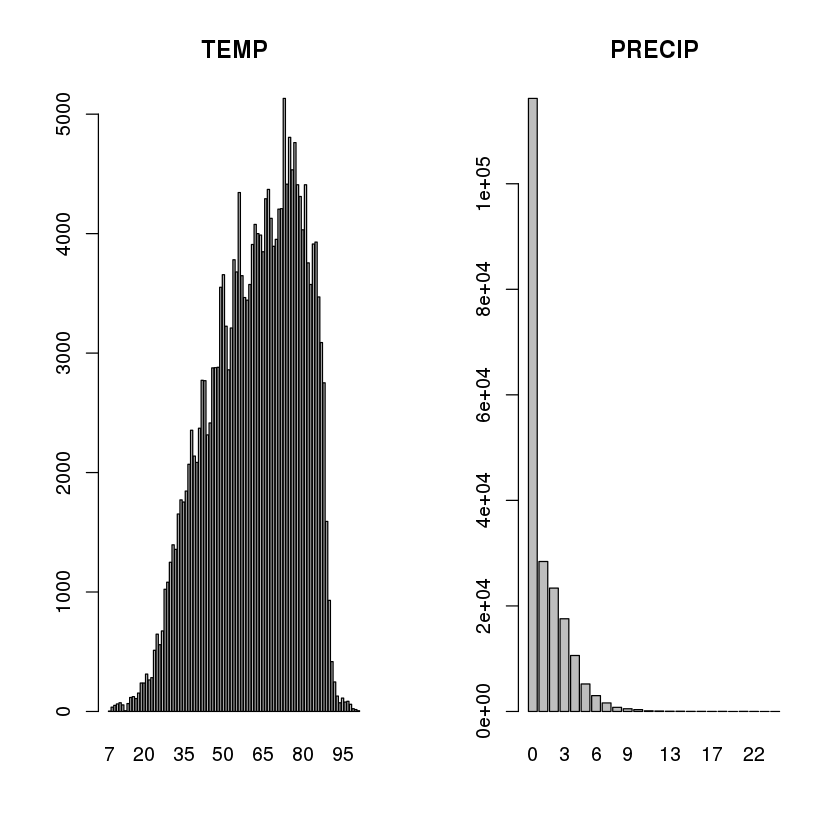

In [37]:
# create a bar plot of each categorical attribute
par(mfrow=c(1,2))
for(i in 4:5) {
counts <- table(df1[,i])
name <- names(df1)[i]
barplot(counts, main=name)
}

## Missing Plot
- Missing data can have a big impact on modeling. Some techniques ignore missing data, others
break. 
- You can use a missing plot to get a quick idea of the amount of missing data in your
dataset.
- The x-axis shows attributes and the y-axis shows instances. 
- Horizontal lines indicate
missing data for an instance, vertical blocks represent missing data for an attribute.

In [46]:
install.packages('Amelia')
library(Amelia)
missmap(df1, col=c("TEMP", "PRECIP"), legend=FALSE)

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sbb6-28ae32a56257b0-666d72869b6d/R/libs’
(as ‘lib’ is unspecified)
Warning message in install.packages("Amelia"):
“installation of package ‘Amelia’ had non-zero exit status”

ERROR: Error in library(Amelia): there is no package called ‘Amelia’


## Multivariate Visualization
- Multivariate plots are plots of the relationship or interactions between attributes.
### Correlation Plot
We can calculate the correlation between each pair of numeric attributes.

Warning message in cor(df1[, 4:7]):
“the standard deviation is zero”

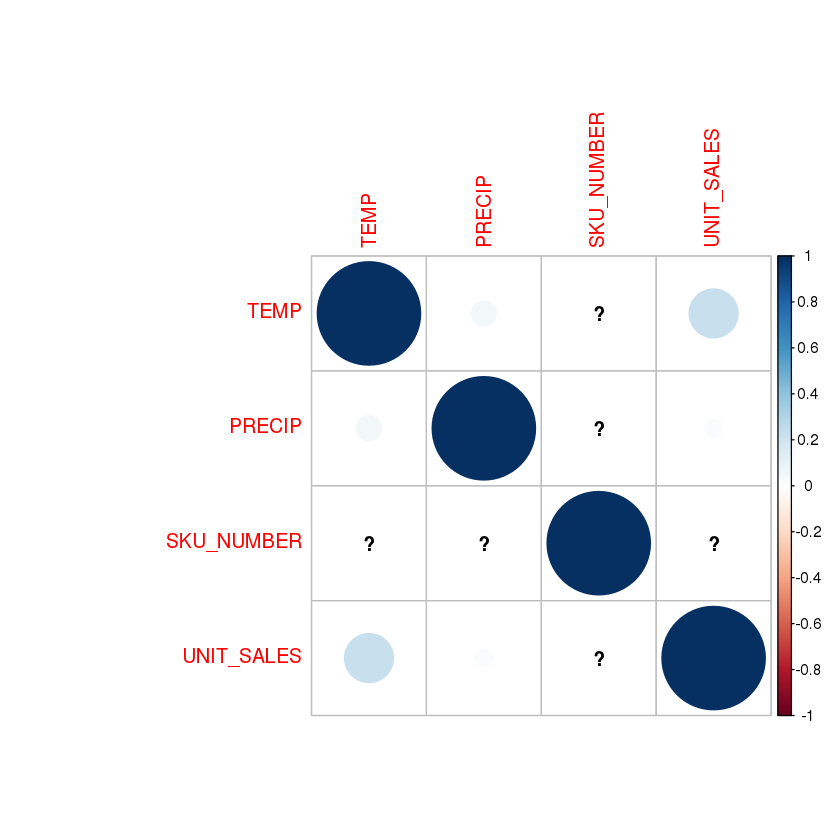

In [45]:
# You may need to install the corrplot package.
library(corrplot)
# calculate correlations
correlations <- cor(df1[,4:7])
# create correlation plot
corrplot(correlations, method="circle")

## Scatter Plot Matrix
A scatter plot plots two variables together, one on each of the x- and y-axes with points showing
the interaction.

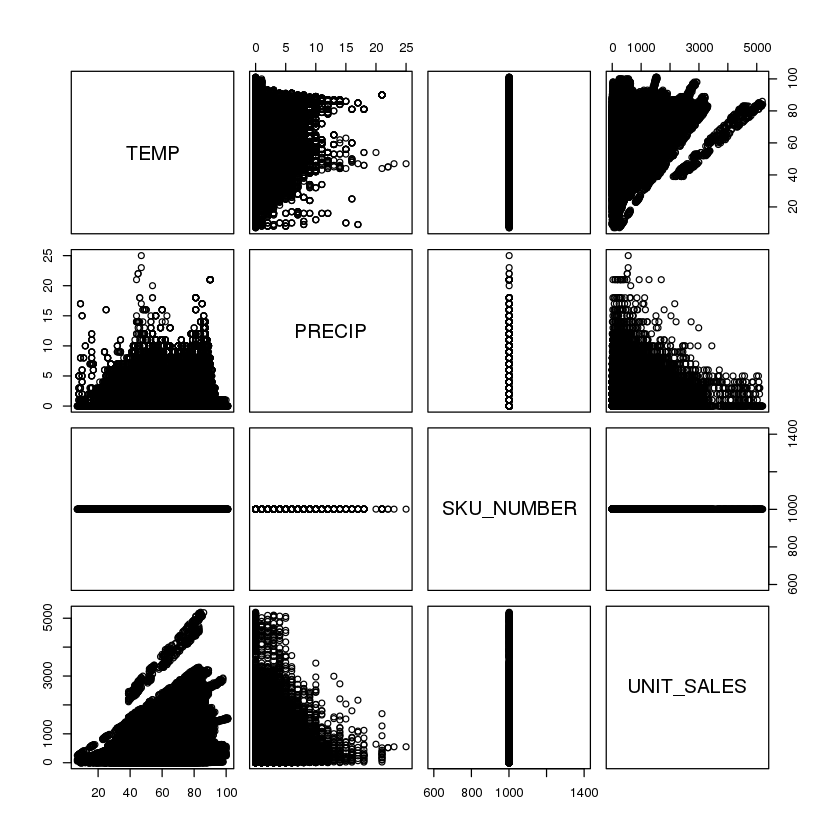

In [49]:
# pairwise scatter plots of all 4 attributes
pairs(df1[,4:7])

## Scatter plot Matrix By Class
The points in a scatter plot matrix can be colored by the class label in classication problems.

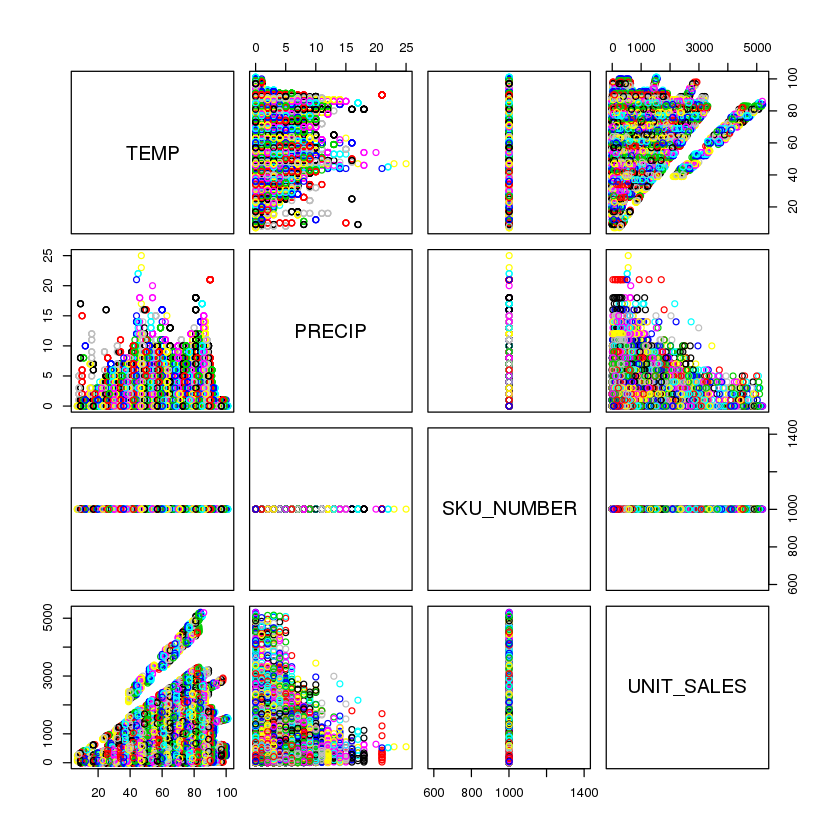

In [57]:
# pairwise scatter plots colored by class
pairs(TEMP~., data=df1[,4:7], col=df1$TEMP)

## Density Plots By Class
We can review the density distribution of each attribute broken down by class value

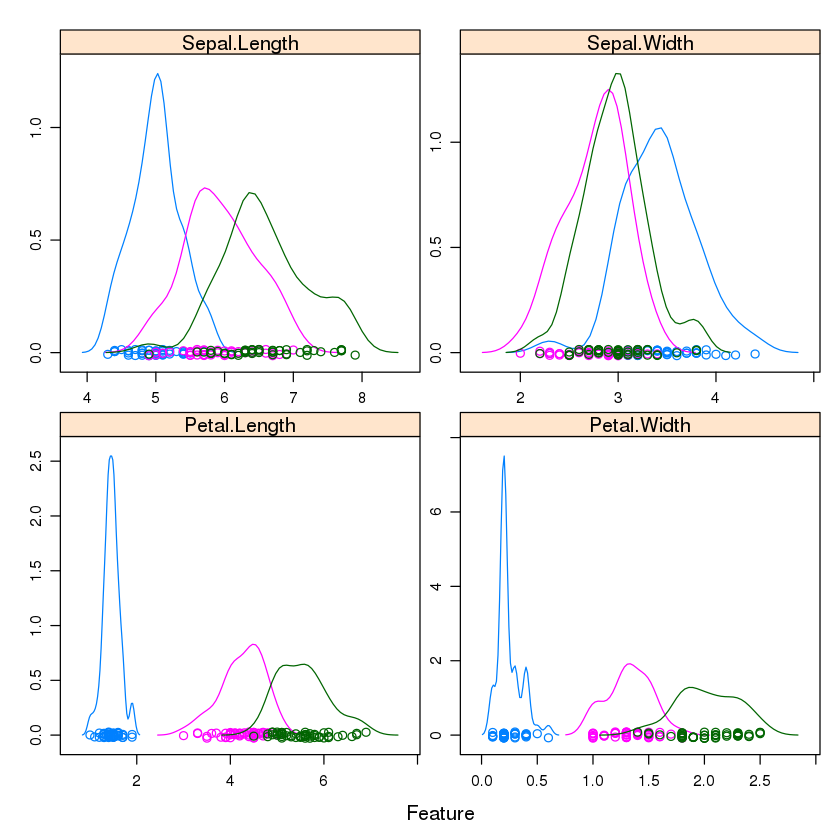

In [71]:
# load the package
library(caret)
# load the data
data(iris)
# density plots for each attribute by class value
x <- iris[,1:4]
y <- iris[,5]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

## Box And Whisker Plots By Class
We can also review the boxplot distributions of each attribute by class value.

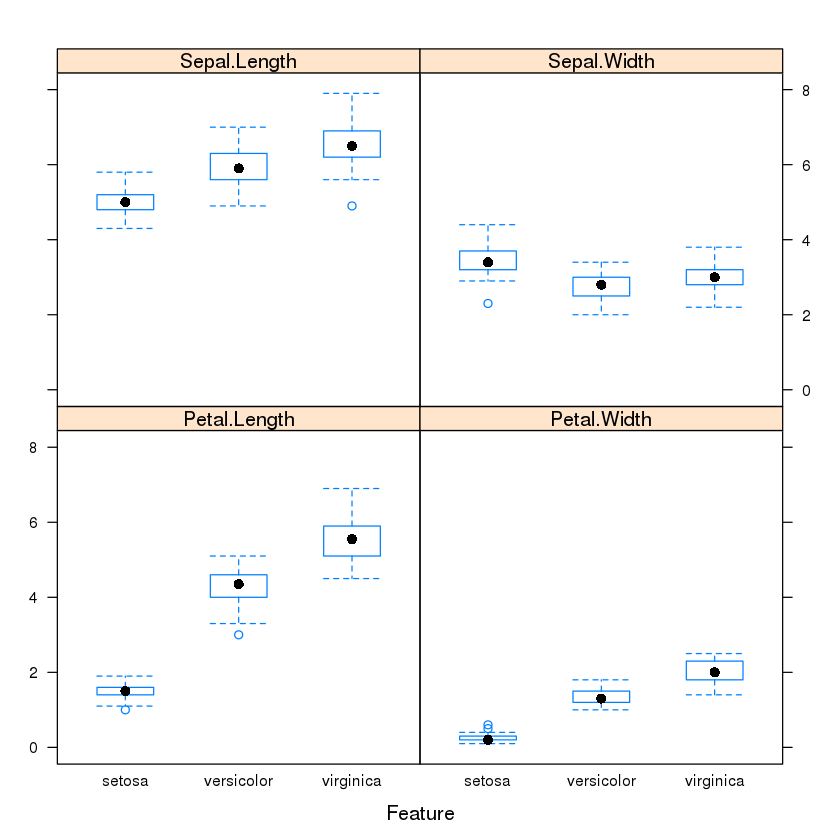

In [70]:
# load the package
library(caret)
# load the iris dataset
data(iris)
# box and whisker plots for each attribute by class value
x <- iris[,1:4]
y <- iris[,5]
featurePlot(x=x, y=y, plot="box")

## Overall Tips
Tips For Data Visualization
- Review Plots. Actually take the time to look at the plots you have generated and think
about them. Try to relate what you are seeing to the general problem domain as well
as specic records in the data. The goal is to learn something about your data, not to
generate a plot.
- Ugly Plots, Not Pretty. Your goal is to learn about your data not to create pretty
visualizations. Do not worry if the graphs are ugly. You a not going to show them to
anyone.
- Write Down Ideas. You will get a lot of ideas when you are looking at visualizations of
your data. Ideas like data splits to look at, transformations to apply and techniques to
test. Write them all down. They will be invaluable later when you are struggling to think
of more things to try to get better results.